<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/ON3_AnalyzeAndReplacePortfolio_v7_CASH_IGNORED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# @title Markov Markowitz Company / Portfolio Analyzer v3 { vertical-output: true }
# @markdown ---
# @markdown Input parameters for asset selection


SHOPPING_LIST_FILE = "ShoppingList.csv" # @param {type:"string"}
YAHOO_PF_FILE = "HANDAN_15.12.2023.csv" # @param {type:"string"}

OFFSET = 0 # @param {type:"number"}
LOOKBACK = 23 # @param {type:"number"}
PURSE = 250000  # @param {type: "number"}
EXCHANGE = "bist30"  # @param ['bist30', 'bist100', 'dow30', 'sp500']
# @markdown ---

BEST_PORTFOLIO_FILE = f"Best_PF_For_{EXCHANGE}.csv"



In [ ]:
from datetime import date, timedelta, datetime
import yfinance as yf

offset = OFFSET
look_back = LOOKBACK
CURRENT_T2 = PURSE
exchange = EXCHANGE

current_date = date.today().isoformat()
days_before = (date.today() - timedelta(days=look_back+offset)).isoformat()
days_after =  (date.today() + timedelta(days=1-offset)).isoformat()

print("\nCurrent Date: ",current_date)
print(f"{look_back+offset} days before current date: ",days_before)
print(f"{offset} days before current date: ",days_after)

STEP = 0
CHART = 0
dateStart = days_before
START_DATE = dateStart
END_DATE   = days_after
START_DATE, END_DATE
start_time = datetime.now()


Current Date:  2023-12-15
23 days before current date:  2023-11-22
0 days before current date:  2023-12-16


In [ ]:
!pip install pyfolio
import pandas as pd
import numpy as np
import pyfolio as py
import io
from google.colab import files



## Special Eyes-Only Report on
# **Individual Portfolio Analysis and Further Suggestions**
#### Report written by **Markov Markowitz Company**
#### Report issued on **27.08.2023**

Any comments should be sent to: info@markovmarkowitz.com


# Step 1: Analysis of present portfolio

Dear Customer,

Per your request, we analysed your present portfolio, as of **27.08.2023** as follows:

In [ ]:
yahoo_pf_file = YAHOO_PF_FILE
best_pf_file = BEST_PORTFOLIO_FILE
exchange = EXCHANGE
shopping_list_file = SHOPPING_LIST_FILE


print("Selected = ", BEST_PORTFOLIO_FILE, EXCHANGE, SHOPPING_LIST_FILE, YAHOO_PF_FILE)

Selected =  Best_PF_For_bist30.csv bist30 ShoppingList.csv HANDAN_15.12.2023.csv


In [ ]:
# show current directory
import os
from pathlib import Path
from IPython.display import display
from PIL import Image

from google.colab import files


def LoadFile(file):
  my_file = Path(f"/content/{file}")
  if my_file.is_file():
    print(f"File {file} is present")
  else:
    print(f"Please upload {file} to be analysed:")
    print(70*'=')
    data = files.upload_file(file)
    display(data)

LoadFile(yahoo_pf_file)
MYPF = pd.DataFrame(pd.read_csv(yahoo_pf_file))

LoadFile(best_pf_file)




File HANDAN_15.12.2023.csv is present
File Best_PF_For_bist30.csv is present


In [ ]:
MYPF['Purchased Value'] = MYPF['Purchase Price'] * MYPF['Quantity']
MYPF['Market Value'] = MYPF['Current Price'] * MYPF['Quantity']
MYPF['PnL %'] = (MYPF['Market Value'] - MYPF['Purchased Value']) / MYPF['Purchased Value'] *100
MYPF.index = MYPF.Symbol
MYPF

,Symbol,Current Price,Date,Time,Change,Open,High,Low,Volume,Trade Date,Purchase Price,Quantity,Commission,High Limit,Low Limit,Comment,Purchased Value,Market Value,PnL %
Symbol,,,,,,,,,,,,,,,,,,,
$$CASH,$$CASH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20231127,NaN,1865.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TURSG.IS,TURSG.IS,37.12,2023/12/15,17:09 TRT,0.680000,36.42,37.22,35.90,3213071.0,20231128,40.72,305.00,0.0,NaN,NaN,NaN,12419.60,11321.60,-8.840864
PENTA.IS,PENTA.IS,19.30,2023/12/15,17:08 TRT,0.250000,19.06,19.72,18.99,2574478.0,20231128,22.22,872.00,0.0,NaN,NaN,NaN,19375.84,16829.60,-13.141314
ENKAI.IS,ENKAI.IS,35.80,2023/12/15,17:09 TRT,1.399998,34.54,36.16,34.52,42983436.0,20231128,34.60,1915.00,0.0,NaN,NaN,NaN,66259.00,68557.00,3.468208
SKBNK.IS,SKBNK.IS,6.92,2023/12/15,17:09 TRT,0.140000,6.78,6.92,6.75,51333557.0,20231128,7.34,2414.00,0.0,NaN,NaN,NaN,17718.76,16704.88,-5.722071
THYAO.IS,THYAO.IS,253.25,2023/12/15,17:09 TRT,1.000000,252.75,256.75,251.50,34025732.0,20231128,261.25,152.00,0.0,NaN,NaN,NaN,39710.00,38494.00,-3.062201
ECZYT.IS,ECZYT.IS,290.75,2023/12/15,17:09 TRT,8.000000,282.75,291.50,282.00,732881.0,20231128,327.00,138.00,0.0,NaN,NaN,NaN,45126.00,40123.50,-11.085627
BAGFS.IS,BAGFS.IS,37.18,2023/12/15,17:09 TRT,0.480000,36.68,37.50,35.50,2152186.0,20231128,38.92,118.00,0.0,NaN,NaN,NaN,4592.56,4387.24,-4.470709
AKFGY.IS,AKFGY.IS,2.02,2023/12/15,17:09 TRT,0.030000,2.00,2.05,1.99,96741006.0,20231128,4.78,9410.00,0.0,NaN,NaN,NaN,44979.80,19008.20,-57.740586


In [ ]:
MYPF.drop(['$$CASH'], axis=0, inplace=True)
MYPF

,Symbol,Current Price,Date,Time,Change,Open,High,Low,Volume,Trade Date,Purchase Price,Quantity,Commission,High Limit,Low Limit,Comment,Purchased Value,Market Value,PnL %
Symbol,,,,,,,,,,,,,,,,,,,
TURSG.IS,TURSG.IS,37.12,2023/12/15,17:09 TRT,0.680000,36.42,37.22,35.90,3213071.0,20231128,40.72,305.0,0.0,NaN,NaN,NaN,12419.60,11321.60,-8.840864
PENTA.IS,PENTA.IS,19.30,2023/12/15,17:08 TRT,0.250000,19.06,19.72,18.99,2574478.0,20231128,22.22,872.0,0.0,NaN,NaN,NaN,19375.84,16829.60,-13.141314
ENKAI.IS,ENKAI.IS,35.80,2023/12/15,17:09 TRT,1.399998,34.54,36.16,34.52,42983436.0,20231128,34.60,1915.0,0.0,NaN,NaN,NaN,66259.00,68557.00,3.468208
SKBNK.IS,SKBNK.IS,6.92,2023/12/15,17:09 TRT,0.140000,6.78,6.92,6.75,51333557.0,20231128,7.34,2414.0,0.0,NaN,NaN,NaN,17718.76,16704.88,-5.722071
THYAO.IS,THYAO.IS,253.25,2023/12/15,17:09 TRT,1.000000,252.75,256.75,251.50,34025732.0,20231128,261.25,152.0,0.0,NaN,NaN,NaN,39710.00,38494.00,-3.062201
ECZYT.IS,ECZYT.IS,290.75,2023/12/15,17:09 TRT,8.000000,282.75,291.50,282.00,732881.0,20231128,327.00,138.0,0.0,NaN,NaN,NaN,45126.00,40123.50,-11.085627
BAGFS.IS,BAGFS.IS,37.18,2023/12/15,17:09 TRT,0.480000,36.68,37.50,35.50,2152186.0,20231128,38.92,118.0,0.0,NaN,NaN,NaN,4592.56,4387.24,-4.470709
AKFGY.IS,AKFGY.IS,2.02,2023/12/15,17:09 TRT,0.030000,2.00,2.05,1.99,96741006.0,20231128,4.78,9410.0,0.0,NaN,NaN,NaN,44979.80,19008.20,-57.740586


In [ ]:
MYPF['Start PF %'] = np.round((MYPF['Purchased Value'] / MYPF['Purchased Value'].sum()) *100, 5)
MYPF['End PF %'] = np.round((MYPF['Market Value'] / MYPF['Market Value'].sum()) *100, 5)

In [ ]:
MYPF.sort_values( by=["Start PF %"], ascending=[False], inplace = True)


In [ ]:
MYPF = MYPF[['Quantity','Purchase Price','Purchased Value','Current Price','Market Value',  'Start PF %', 'End PF %', 'PnL %']]

In [ ]:
CURRENT_T2 = MYPF['Market Value'].sum()
CURRENT_T2

215426.02000000002

In [ ]:
PV = MYPF['Purchased Value'].sum()
FV = MYPF['Market Value'].sum()

MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])
MYPF



<ipython-input-500-f0354df3cca1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
<ipython-input-500-f0354df3cca1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])


,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
ENKAI.IS,1915.0,34.60,66259.00,35.80,68557.00,26.48437,31.82392,3.468208,68557.0,1915.0
ECZYT.IS,138.0,327.00,45126.00,290.75,40123.50,18.03730,18.62519,-11.085627,40123.0,137.0
AKFGY.IS,9410.0,4.78,44979.80,2.02,19008.20,17.97886,8.82354,-57.740586,19008.0,9409.0
THYAO.IS,152.0,261.25,39710.00,253.25,38494.00,15.87247,17.86878,-3.062201,38494.0,152.0
PENTA.IS,872.0,22.22,19375.84,19.30,16829.60,7.74471,7.81224,-13.141314,16829.0,871.0
SKBNK.IS,2414.0,7.34,17718.76,6.92,16704.88,7.08236,7.75435,-5.722071,16704.0,2413.0
TURSG.IS,305.0,40.72,12419.60,37.12,11321.60,4.96423,5.25545,-8.840864,11321.0,304.0
BAGFS.IS,118.0,38.92,4592.56,37.18,4387.24,1.83569,2.03654,-4.470709,4387.0,117.0


In [ ]:
# prompt: MYPF veri çerçevesi kullanılıyor:

MYPF.head()


,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
ENKAI.IS,1915.0,34.60,66259.00,35.80,68557.0,26.48437,31.82392,3.468208,68557.0,1915.0
ECZYT.IS,138.0,327.00,45126.00,290.75,40123.5,18.03730,18.62519,-11.085627,40123.0,137.0
AKFGY.IS,9410.0,4.78,44979.80,2.02,19008.2,17.97886,8.82354,-57.740586,19008.0,9409.0
THYAO.IS,152.0,261.25,39710.00,253.25,38494.0,15.87247,17.86878,-3.062201,38494.0,152.0
PENTA.IS,872.0,22.22,19375.84,19.30,16829.6,7.74471,7.81224,-13.141314,16829.0,871.0


In [ ]:
def DownloadAssetsAndWriteToCSVs(names):
  price_list = []
  print(LENGTH*"*")
  print("Starting Download ...")
  print(LENGTH*"*")
  for tick in names:
    print(f"Downloading {tick}")
    yf_tick = yf.Ticker(tick)
    df = yf_tick.history(interval='1d', auto_adjust=True, start=START_DATE, end=END_DATE, back_adjust = True, rounding=True)
    df.dropna(how='all', inplace=True)
    price_list.append(df)
  print(LENGTH*"*")
  print(LENGTH*"*")

  # Save datafiles to disk

  for i,df in enumerate(price_list):
        df.to_csv(f"{names[i]}.csv")
  print(price_list)



In [ ]:
def ConstructPortfolioTimeSeries(portfolio, NEW_DOWNLOAD):

    if NEW_DOWNLOAD:
        DownloadAssetsAndWriteToCSVs(portfolio.index)
    import yfinance as yf
    print(f"Construct Time series...")
    # print(f"portfolio = {portfolio} is input")
    print(70*'=')

    Residue_Cash = CURRENT_T2
    #os.chdir(wd)

    OrderedTable = pd.DataFrame()
    df = pd.DataFrame()
    names = portfolio.index
    #print(names)
    filename = f"{names[0]}.csv"
    #print(filename)

    portfolio['Portfolio_Weights'] = portfolio['End PF %']/100


    df = pd.read_csv(filename) #change 1
    OrderedTable["Date"] = df.iloc[:,0] #change 3
    for tick in names:
      #print(f"Fetching {tick}")
      filename = f"{tick}.csv"
      #filename = f"{names[0]+'.IS'}.csv"
      df = pd.read_csv(filename)
      #df = pd.read_csv(filename, index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",") #change 2
      OrderedTable[f"{tick}"] = df['Close']  # get each ETFs column write inside OrderedTable


    print("Ordered Table: \n",OrderedTable)

    portfolio['InitialPrices'] = OrderedTable.iloc[0,1:].values
    #print(f"\n Initial prices: \n{InitialPrices} \n")

    portfolio['FinalPrices'] = OrderedTable.iloc[-1,1:].values
    #print(f"\n Final prices: {FinalPrices}")

    Update_Capital = Residue_Cash # add the cash not used for stocks

    portfolio['Portfolio_Amounts'] = np.multiply(Update_Capital, portfolio['Portfolio_Weights'] )
    #print(f" Portfolio amounts: \n{Portfolio_Amounts} \n")

    portfolio['Portfolio_Shares'] = np.trunc(portfolio['Portfolio_Amounts'] / portfolio['InitialPrices'] )  # determine shares

    #print(f" Portfolio shares: \n{portfolio['Portfolio_Shares']} ")

    portfolio['Purchased Value'] = portfolio['InitialPrices'] * portfolio['Portfolio_Shares']

    portfolio['Market Value'] = portfolio['FinalPrices'] * portfolio['Portfolio_Shares']
    portfolio['PnL %'] = (portfolio['Market Value'] - portfolio['Purchased Value']) / MYPF['Purchased Value'] *100
    portfolio['Start PF %'] = portfolio['Purchased Value'] / portfolio['Purchased Value'].sum() *100
    portfolio['End PF %'] = portfolio['Market Value'] / portfolio['Market Value'].sum() *100

    portfolio['Market Value'] = pd.to_numeric(portfolio['Market Value']).round(2)
    portfolio['PnL %'] = pd.to_numeric(portfolio['PnL %']).round(2)
    portfolio['Start PF %'] = pd.to_numeric(portfolio['Start PF %']).round(2)
    portfolio['End PF %'] = pd.to_numeric(portfolio['End PF %']).round(2)

    Prices = OrderedTable.iloc[:,1:].values

    FirstPrices = OrderedTable.iloc[0,0:len(names)].values
    FirstPrices

    OrderedTable['PF_Value'] = np.dot(portfolio['Portfolio_Shares'], Prices.T)  # PF_VALUE = dot product of shares and their prices !!!!
    #print(OrderedTable['PF_Value'])

    Residue_Cash = Update_Capital - OrderedTable.PF_Value.iloc[0] # !!!
    print(f" Residue cash: {Residue_Cash} \n")

    OrderedTable['PF_Value'] += Residue_Cash

    Update_Capital = OrderedTable.PF_Value.iloc[-1] # Update_Captial =  value of the PF at the end of every quarter

    #print(f" Portfolio capital at the end of period: {Update_Capital} \n")
    #print(" Ordered Table: \n")

    OrderedTable['pct_change'] = OrderedTable['PF_Value'].pct_change()
    OrderedTable.set_index("Date", inplace = True)
    OrderedTable.index = pd.to_datetime(OrderedTable.index)  # PYFOLIO nun düzgün çalışması icin bu gerekli
    return OrderedTable, portfolio

In [ ]:
def ShowTearSheet(OrderedPctChange, which="Current"):
    print(f"Showing Tearsheet of {which} Portfolio...")
    print(70*'=')
    import pyfolio
    print(f"********* PORTFOLIO TEARSHEET *************** ")

    try:
        simple_tear_sheet = pyfolio.create_simple_tear_sheet(OrderedPctChange)
        print("********* end of TEARSHEET **************\n")
        #simple_tear_sheet.savefig(f"Chart_{CHART}_Ret_Tear_sheet.jpg", format='jpg', dpi=300)
        #from IPython.display import Image
        #Image(url=f"Chart_{CHART}_Simple_Tear_sheet.jpg")

    except Exception as e:
        print("Error generating returns tear sheet:", e)
        returns_tear_sheet = None

In [ ]:
show_df = pd.DataFrame({"assets":MYPF.index.T, "%": np.round(MYPF['End PF %'],4), "amounts": MYPF['Market Value']})
#show_df = show_df.loc[(show_df["%"]>0)]
show_df = MYPF.sort_values(by=['End PF %'],ascending=False)
show_df



,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
ENKAI.IS,1915.0,34.60,66259.00,35.80,68557.00,26.48437,31.82392,3.468208,68557.0,1915.0
ECZYT.IS,138.0,327.00,45126.00,290.75,40123.50,18.03730,18.62519,-11.085627,40123.0,137.0
THYAO.IS,152.0,261.25,39710.00,253.25,38494.00,15.87247,17.86878,-3.062201,38494.0,152.0
AKFGY.IS,9410.0,4.78,44979.80,2.02,19008.20,17.97886,8.82354,-57.740586,19008.0,9409.0
PENTA.IS,872.0,22.22,19375.84,19.30,16829.60,7.74471,7.81224,-13.141314,16829.0,871.0
SKBNK.IS,2414.0,7.34,17718.76,6.92,16704.88,7.08236,7.75435,-5.722071,16704.0,2413.0
TURSG.IS,305.0,40.72,12419.60,37.12,11321.60,4.96423,5.25545,-8.840864,11321.0,304.0
BAGFS.IS,118.0,38.92,4592.56,37.18,4387.24,1.83569,2.03654,-4.470709,4387.0,117.0


In [ ]:
LENGTH = 64
print("Dear Customer, now starting to analyze your current portfolio performance...")
print(LENGTH*"-")
print(LENGTH*"-")

OrderedTimeSeries, IDEAL_PF = ConstructPortfolioTimeSeries(show_df, NEW_DOWNLOAD=True)
OrderedTimeSeries




Dear Customer, now starting to analyze your current portfolio performance...
----------------------------------------------------------------
----------------------------------------------------------------
****************************************************************
Starting Download ...
****************************************************************
****************************************************************
****************************************************************
[                            Open   High    Low  Close    Volume  Dividends  \
Date                                                                         
2023-11-22 00:00:00+03:00  33.82  35.42  33.70  34.96  59200657        0.0   
2023-11-23 00:00:00+03:00  35.06  35.10  34.00  34.02  28531797        0.0   
2023-11-24 00:00:00+03:00  34.06  34.62  33.88  34.42  21510877        0.0   
2023-11-27 00:00:00+03:00  34.56  34.74  34.26  34.60  19562928        0.0   
2023-11-28 00:00:00+03:00  34.66  35.88  3

,ENKAI.IS,ECZYT.IS,THYAO.IS,AKFGY.IS,PENTA.IS,SKBNK.IS,TURSG.IS,BAGFS.IS,PF_Value,pct_change
Date,,,,,,,,,,
2023-11-22 00:00:00+03:00,34.96,290.00,262.00,4.5800,22.36,7.29,38.90,35.42,215426.02,NaN
2023-11-23 00:00:00+03:00,34.02,295.00,260.75,4.5800,23.08,7.30,41.00,34.82,215191.83,-0.001087
2023-11-24 00:00:00+03:00,34.42,324.50,259.75,4.6000,22.46,7.29,41.44,35.22,219672.32,0.020821
2023-11-27 00:00:00+03:00,34.60,326.25,260.50,4.6800,22.64,7.43,41.96,38.74,221748.68,0.009452
2023-11-28 00:00:00+03:00,35.70,342.00,261.00,4.7600,21.56,7.22,40.60,38.44,224758.35,0.013572
2023-11-29 00:00:00+03:00,35.32,323.75,255.00,4.6500,21.28,7.08,38.34,41.74,219379.11,-0.023933
2023-11-30 00:00:00+03:00,35.16,333.50,251.00,4.5000,21.00,7.00,38.12,40.34,218574.29,-0.003669
2023-12-01 00:00:00+03:00,34.90,323.00,260.75,4.5300,21.40,7.11,37.40,39.10,218354.2,-0.001007
2023-12-04 00:00:00+03:00,34.86,305.25,262.00,4.4300,21.18,6.99,36.68,42.24,215330.1,-0.013850


In [ ]:
np.mean(OrderedTimeSeries['pct_change'].dropna()) *100

-0.35566598152790646

Showing Tearsheet of HANDAN_15.12.2023.csv Portfolio...
********* PORTFOLIO TEARSHEET *************** 


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-11-23
End date,2023-12-15
Total months,0
,Backtest
Annual return,-62.0%
Cumulative returns,-6.3%
Annual volatility,37.9%
Sharpe ratio,-2.36
Calmar ratio,-4.30
Stability,0.75
Max drawdown,-14.4%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


********* end of TEARSHEET **************



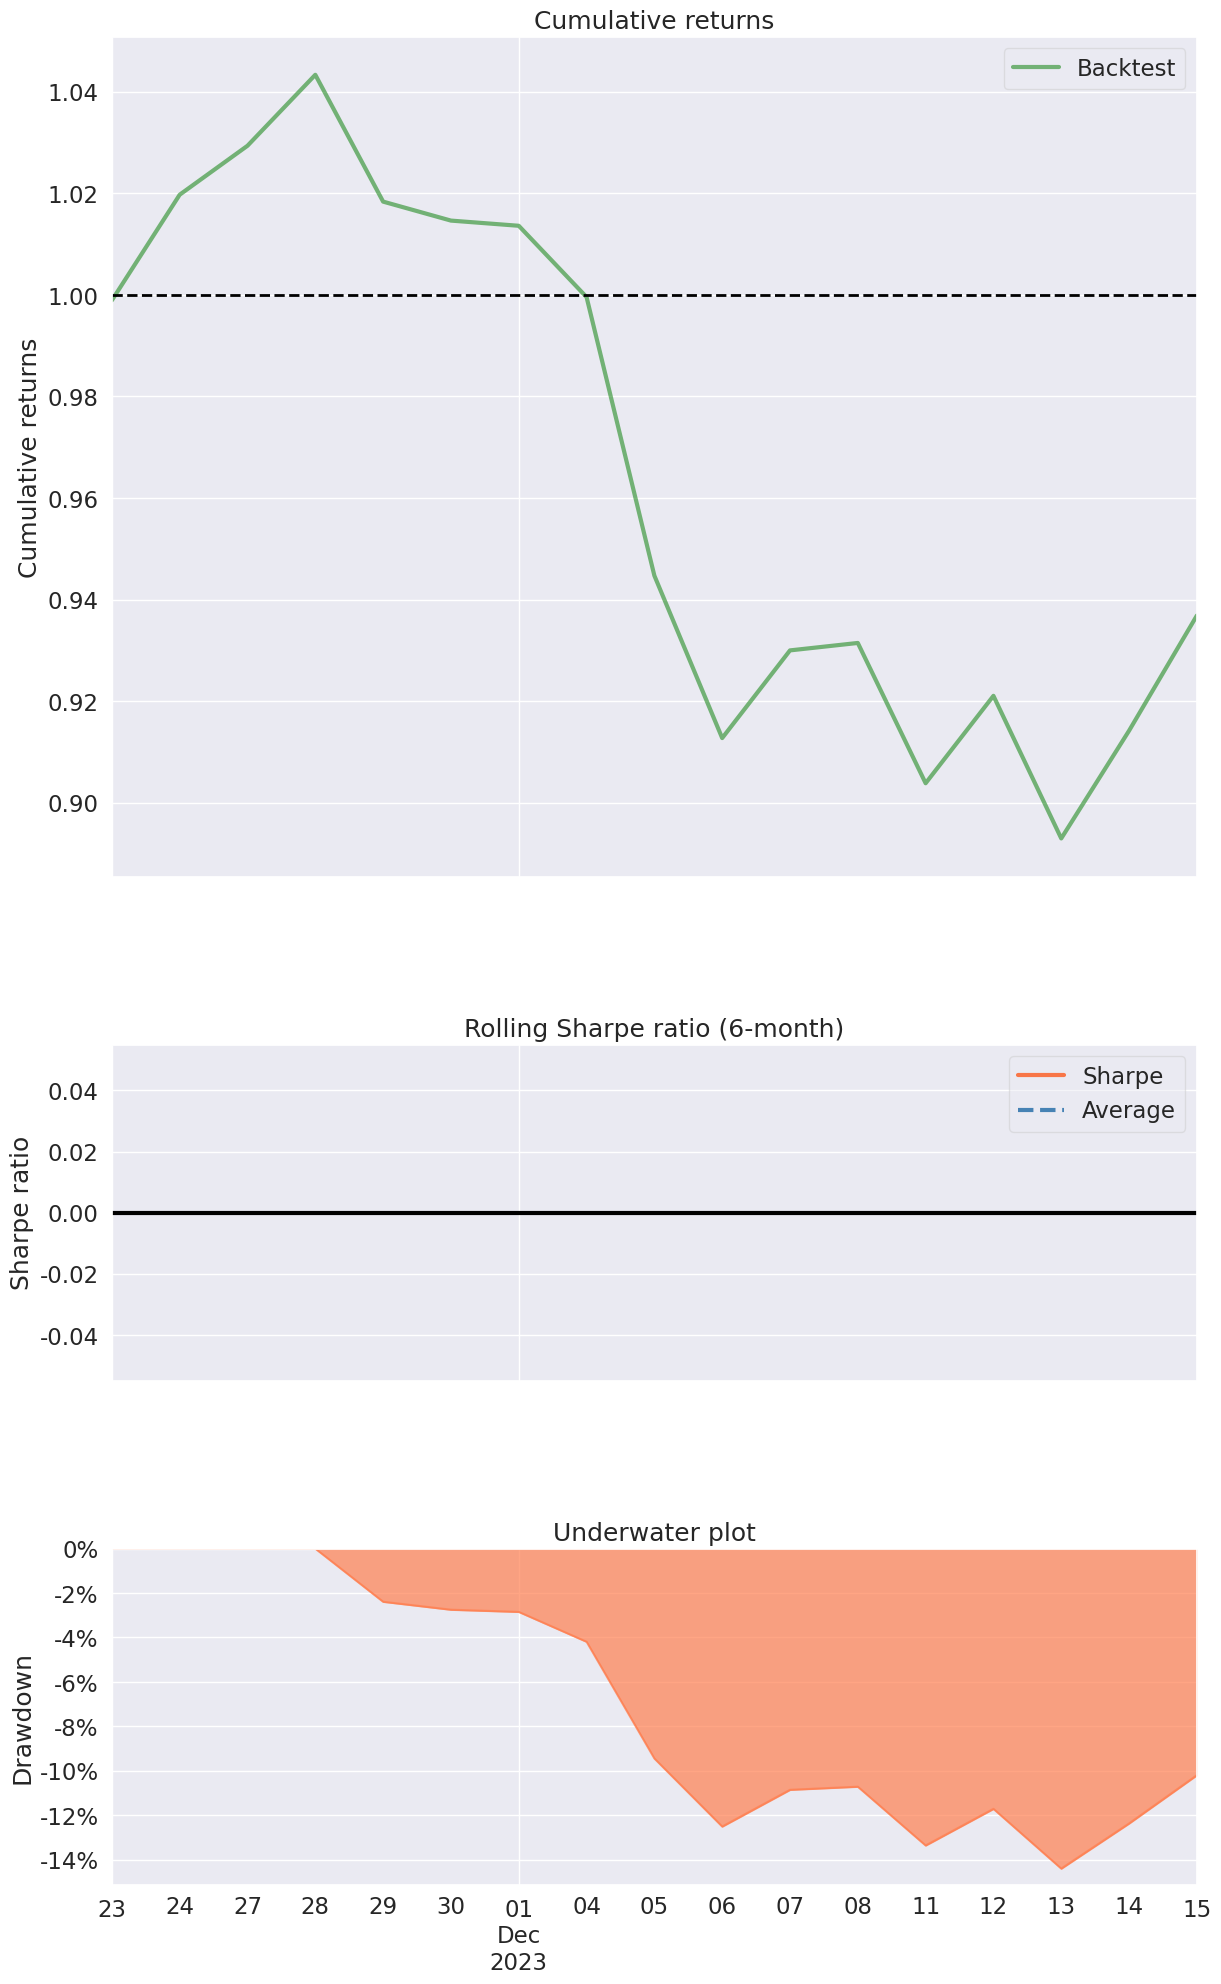

In [ ]:
ShowTearSheet(OrderedTimeSeries['pct_change'].dropna(), YAHOO_PF_FILE)

In [ ]:
import pyfolio as pf
pystats_df = pf.timeseries.perf_stats(OrderedTimeSeries['pct_change'].dropna())
max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTimeSeries['pct_change'].dropna()))
annual_return = pf.timeseries.annual_return(OrderedTimeSeries['pct_change'].dropna())
sharpe_ratio = pf.timeseries.sharpe_ratio(OrderedTimeSeries['pct_change'].dropna())
print("CURRENT PORTFOLIO PERFORMANCE")
pystats_df

CURRENT PORTFOLIO PERFORMANCE


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
<ipython-input-509-97d2e39f3402>:3: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTimeSeries['pct_change'].dropna()))
<ipython-input-509-97d2e39f3402>:4: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  annual_return = pf.timeseries.annual_return(OrderedTimeSeries['pct_change'].dropna())
<ipython-input-509-97d2e39f3402>:5: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyri

Annual return         -0.619680
Cumulative returns    -0.063136
Annual volatility      0.379378
Sharpe ratio          -2.362496
Calmar ratio          -4.300370
Stability              0.749473
Max drawdown          -0.144099
Omega ratio            0.685723
Sortino ratio         -2.834651
Skew                  -0.574708
Kurtosis              -0.733782
Tail ratio             0.629665
Daily value at risk   -0.051354
dtype: float64

In [ ]:
IDEAL_PF

,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity,Portfolio_Weights,InitialPrices,FinalPrices,Portfolio_Amounts,Portfolio_Shares
Symbol,,,,,,,,,,,,,,,
ENKAI.IS,1915.0,34.60,68556.56,35.80,70203.80,31.88,34.85,2.49,68557.0,1915.0,0.318239,34.96,35.8,68557.004264,1961
ECZYT.IS,138.0,327.00,40020.0,290.75,40123.50,18.61,19.92,0.23,40123.0,137.0,0.186252,290.0,290.75,40123.505534,138
THYAO.IS,152.0,261.25,38252.0,253.25,36974.50,17.79,18.36,-3.22,38494.0,152.0,0.178688,262.0,253.25,38494.001577,146
AKFGY.IS,9410.0,4.78,19007.0,2.02,8383.00,8.84,4.16,-23.62,19008.0,9409.0,0.088235,4.58,2.02,19008.201045,4150
PENTA.IS,872.0,22.22,16814.72,19.30,14513.60,7.82,7.21,-11.88,16829.0,871.0,0.078122,22.36,19.3,16829.597705,752
SKBNK.IS,2414.0,7.34,16701.39,6.92,15853.72,7.77,7.87,-4.78,16704.0,2413.0,0.077544,7.29,6.92,16704.887582,2291
TURSG.IS,305.0,40.72,11319.9,37.12,10801.92,5.26,5.36,-4.17,11321.0,304.0,0.052554,38.9,37.12,11321.606768,291
BAGFS.IS,118.0,38.92,4356.66,37.18,4573.14,2.03,2.27,4.71,4387.0,117.0,0.020365,35.42,37.18,4387.237068,123


In [ ]:


# A function to generate the avg return, risk and the sharpe ratio of the portfolio
# correponding to the weight array passed
def portfolio_stats(weight):

    # Convert to array in case list was passed instead.
    weight = np.array(weight)
    port_return = np.sum(log_returns.mean() * weight) * 252
    #port_return = log_returns.mean() * weight
    port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight)))
    #port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight))) / np.sqrt(252)
    sharpe = (port_return - risk_free_rate)/port_risk

    return {'return': port_return, 'risk': port_risk, 'sharpe': sharpe}

In [ ]:
def EvaluatePortfolio(weight):

    pf_stats = portfolio_stats(weight)
    pf_return = pf_stats['return']
    pf_risk = pf_stats['risk']
    pf_sharpe = pf_stats['sharpe']
    return pf_stats




In [ ]:

def Monte_Carlo(iterations):
    portfolio_returns = []
    portfolio_risks = []
    for x in range (iterations):
        weight = RandWeights(length)
        pf_stats = portfolio_stats(weight)
        portfolio_returns.append(pf_stats['return'])
        portfolio_risks.append(pf_stats['risk'])

    portfolio_returns = np.array(portfolio_returns)
    portfolio_risks = np.array(portfolio_risks)
    return portfolio_returns, portfolio_risks


In [ ]:
def OptimizationWithSharpeRatio():

    def FindNegSharpe(weight):
        return (-1)*portfolio_stats(weight)['sharpe']

    res = minimize(
          FindNegSharpe,
          RandWeights(length),
          method = 'SLSQP',
          constraints=[
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
          ],
          bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(length)]
        )

    return res


In [ ]:
def FindWeights():
    WEIGHT_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['return']
    STDDEV_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['risk']/np.sqrt(252)
    Optimal_weights_for_Percent_Returns = OptimizationForAGivenReturn(WEIGHT_HSR).x
    print(portfolio_stats(Optimal_weights_for_Percent_Returns))
    print(np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4))
    return np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4)

In [ ]:
# A function for generating a numpy array containing random weights that add upto 1
def RandWeights(size):
    weight = np.random.dirichlet(alpha = np.ones(size))
    # BURAYA MAKSIMUM AGIRLIGIN %20 OLABILECEGI KOSULU EKLE
    return weight

In [ ]:
exchange = "BIST30"

def AddToStockList(alist,item):
    a = []
    for i in alist:
        a.append(i)
    a.append(item)
    return (a)

def AddTRYXToStockList(sl):
    if exchange == "BIST500" or exchange == "BIST30":
        if 'TRY=X' not in sl:
            sl = AddToStockList(sl, 'TRY=X')
            return sl



In [ ]:
stock_list = MYPF.index
stock_list = AddTRYXToStockList(stock_list)
stock_list

['ENKAI.IS',
 'ECZYT.IS',
 'AKFGY.IS',
 'THYAO.IS',
 'PENTA.IS',
 'SKBNK.IS',
 'TURSG.IS',
 'BAGFS.IS',
 'TRY=X']

In [ ]:


look_back = 93
BACKTEST_PERIOD = 93
FW_TEST_PERIOD = 93

from datetime import datetime, date, timedelta
import time
import yfinance as yf

start_time = datetime.now()

T0_START = ( date.today() - timedelta( days = look_back))
T0_END   = ( T0_START + timedelta( days = BACKTEST_PERIOD ))
T1_START = ( T0_END   + timedelta( days = 1 ))
T1_END   = ( T1_START + timedelta( days = FW_TEST_PERIOD ))

import yfinance as yf
'''
UTILITY U=020 : DOWNLOAD_ASSETS_&_WRITE_DF BY SELECTING WEEKDAY DATA ONLY
--------------------------------------------
- CHANGES WORKING DIRECTORY
- SET FLAG TO NEW_DOWNLOAD
- GETS DATA FOR ALL ASSETS IN stock_list FROM YAHOO FINANCE
- FILTERS WEEKEND DATA OUT
- WRITES DATA IN df and price_list
- WRITES DATA IN CSV FILES

DIKKAT: stock_list in dataframe degil list olmasi gerekli !!!

'''
def DownloadAssetsAndWriteToCSVs(stock_list):
    new_download = True
    price_list = []
    if new_download:
        print(LENGTH*"*")
        print(f"Starting Download of filtered {len(stock_list)} {exchange} assets")
        print(LENGTH*"*")
        for tick in stock_list:
            try:   # added 1/07/22
                print(f"Downloading {tick}")
                yf_tick = yf.Ticker(tick)
                df = yf_tick.history(interval='1d', auto_adjust=True, start=T0_START, end=T0_END, back_adjust = True, rounding=True)
                #df = web.DataReader(tick, "yahoo", T0_START, T0_END)["Adj Close"]
                df['Close'] = df['Close'].mask( (tick == "XU100.IS" or tick == "XU030.IS") & (df['Close'] > 10000), other = df['Close'] / 100.0)
                df.dropna(how='all', inplace=True)
                price_list.append(df)
            except Exception as e:    # added 1/07/22
                print(e, tick)        # added 1/07/22
        print(LENGTH*"*")
        print(f" DOWNLOADED {len(stock_list)} TICKERS from {exchange}")
        print(LENGTH*"*")

        # exclude weekends


        #df = df[df.index.dayofweek < 5]

        ## Save datafiles to disk

        for i,df in enumerate(price_list):
            df.to_csv(f"{stock_list[i]}.csv")



    # UTILITY U=021 : FETCH_ASSETS_FROM_CSV_FILES_&_WRITE_DF
    # --------------------------------------------
    # - CHANGES WORKING DIRECTORY
    # - SET FLAG TO NEW_DOWNLOAD
    # - GETS DATA FOR ALL ASSETS IN stock_list FROM CSV FILES
    # - PUTS DATA in df
    #


    else:
        price = {}
        print(LENGTH*"*")
        print("Fetching Downloaded CSV Files ...")
        print(LENGTH*"*")
        for tick in stock_list:
            print(f"Fetching {tick}")
            filename = f"{tick}.csv"
            df = pd.read_csv(filename)
            price[tick] = df
        print(LENGTH*"*")
        #print('Done ...Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))
        print(LENGTH*"*")




In [ ]:
DownloadAssetsAndWriteToCSVs(stock_list)

****************************************************************
Starting Download of filtered 9 BIST30 assets
****************************************************************
****************************************************************
 DOWNLOADED 9 TICKERS from BIST30
****************************************************************


In [ ]:
'''
UTILITY U=001A : CSV_MERGER_DATE_REVERSED
--------------------------------------------
- FUNCTION NAME: def CSV_2_DF_REV_ORDER()
- input: exhange name, stocklist
- output: sorted (DF)
- READS desired assets from csv files
- APPENDS the 'close' columns required in a single df name `li`
- SORTS dataframe in reversed order
- WRITES to csv file

'''

def MergeCSVFiles(stock_list):
    import pandas as pd
    import os

    pf_data = pd.DataFrame()
    li = pd.DataFrame() # my real portfolio dataframe
    rets = pd.DataFrame()
    names = []
    count = len(stock_list)

    #os.chdir(wd)
    #for file in sorted2.Stock:
    for file in stock_list:

        pf_data = pd.read_csv(f"{file}.csv", index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",")
        li = pd.concat( [li,pf_data['Close']],axis=1) #, ignore_index=True)
        st_name = file.split('.',maxsplit = 1)
        names.append(st_name[0])

    li.columns = names

    #USDTRY CONVERSION


    li = li.rename_axis(index="Date")
    sorted = li.sort_values(by=['Date'], ascending=[False])
    # exclude weekends

    #sorted = sorted[sorted.index.dayofweek < 5]
    #sorted = omit_dates(sorted, omit_weekends=True)
    sorted.to_csv(f"{exchange}_Close.csv")

    print("CSV files merged")
    return(f"{exchange}_Close.csv")


csv = MergeCSVFiles(stock_list)

CSV files merged


In [ ]:
def ReadMergedCSVToPfData(CSVfilename):
    pf_data=pd.read_csv(CSVfilename)
    pf_data.set_index("Date", inplace = True)
    pf_data = pf_data.sort_values(by=['Date'], ascending=[True])
    pf_data.dropna(inplace=True)
    return pf_data

In [ ]:
pf_data = ReadMergedCSVToPfData(f"{exchange}_Close.csv")

In [ ]:
def ConvertTimeseriesToUSD(PFDATA):
    if exchange == "BIST500" or exchange == "BIST30" :
        new_names = []
        for i in stock_list:
            sl = i.split('.',maxsplit = 1)
            new_names.append(sl[0])
        for i in new_names:
            if i != 'GC=F' and i != 'CL=F':
                PFDATA[i] = pd.Series(PFDATA[i] / PFDATA['TRY=X'])
        return PFDATA

pf_data = ConvertTimeseriesToUSD(pf_data)

In [ ]:
# def DrawSelectedAssetsPerformance(pf_data):
#     from PIL import Image as im
#     fig = plt.figure(dpi=250) # plt.figure()
#     #(pf_data[Metals]/pf_data[Metals].iloc[0]).plot(figsize = (15,30))
#     (pf_data/pf_data.iloc[-pf_data.shape[0]]).tail(pf_data.shape[0]).plot(figsize = (15,10))
#     plt.grid(True)
#     plt.title(f"Seçilen {exchange} hisselerinin son {pf_data.shape[0]} günü ")
#     plt.savefig("Fig_001_BIST30_Selected.jpg", format='jpg', dpi=300)
#     from IPython.display import Image
#     Image(url="Fig_001_BIST30_Selected.jpg")


# DrawSelectedAssetsPerformance(pf_data)

In [ ]:
def ConvertTimeSeriesToReturns(pf_data):

    log_returns = np.log(pf_data/pf_data.shift(1))
    return log_returns

log_returns = ConvertTimeSeriesToReturns(pf_data)

In [ ]:

def CalculateRandomWeights():
    length = len(log_returns.columns)
    weight = RandWeights(length)
    return length, weight

length, weight = CalculateRandomWeights()

In [ ]:
P_BOUND_LO = 0
P_BOUND_HI = 1
risk_free_rate  = 0.25

from scipy.optimize import minimize
Optimal_weights_For_Highest_Sharpe_Ratio = OptimizationWithSharpeRatio().x
Optimal_weights_For_Highest_Sharpe_Ratio

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

array([0.02329055, 0.18865101, 0.02372884, 0.02451479, 0.26468996,
       0.16936768, 0.0466405 , 0.03754222, 0.22157445])

In [ ]:

def OptimizationForAGivenReturn(target_return):

    def fun(weight):
        pf_stats = portfolio_stats(weight)
        _risk = pf_stats['risk']
        return _risk

    res = minimize(
      fun,
      RandWeights(length),
      method = 'SLSQP',
      constraints=[{'type':'eq','fun': lambda x: portfolio_stats(x)['return']-target_return},
                   {'type':'eq','fun': lambda x: np.sum(x)-1}],
      bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(length)]
    )

    return res


In [ ]:
Optimal_weights_for_Percent_Returns = FindWeights()

{'return': 0.0, 'risk': nan, 'sharpe': nan}
[0.0233 0.1887 0.0237 0.0245 0.2647 0.1694 0.0466 0.0375 0.2216]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [ ]:
currency        = "TL"

w = np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4)

def OptimizeWeights(w,stock_list):

    BEST_PF = pd.Series(w*100, stock_list)
    print("% weights of BEST PF")
    index = w>=0.01
    a = pd.DataFrame(BEST_PF[index].round(3),  columns=['%'] )
    Portfolio_Weights = w[index].round(4)
    Portfolio_Assets = BEST_PF[index]
    Portfolio_Amounts = Portfolio_Weights*CURRENT_T2
    a[f"Amount in {CURRENT_T2} {currency}"] = np.round(Portfolio_Amounts,2)
    pf_stats = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)
    print(portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio))
    a.sort_values(by=['%'], ascending=[False], inplace = True)
    print(a[f"Amount in {CURRENT_T2} {currency}"])
    return a

Final_TEFAS_PF = OptimizeWeights(Optimal_weights_For_Highest_Sharpe_Ratio, stock_list)





/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


% weights of BEST PF
{'return': 0.0, 'risk': nan, 'sharpe': nan}
PENTA.IS    57023.27
TRY=X       47738.41
ECZYT.IS    40650.89
SKBNK.IS    36493.17
TURSG.IS    10038.85
BAGFS.IS     8078.48
THYAO.IS     5277.94
AKFGY.IS     5105.60
ENKAI.IS     5019.43
Name: Amount in 215426.02000000002 TL, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [ ]:
fn =  f"Best_PF_For_{EXCHANGE}.csv"
print("making operation with ",fn)
Array_BESTPF_weights = np.array(pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")['End PF %']/100)
assets = pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")['assets']
Markowitz_PF = pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")
Markowitz_Weights = OptimizeWeights(Array_BESTPF_weights, assets)

making operation with  Best_PF_For_bist30.csv
% weights of BEST PF
{'return': 0.0, 'risk': nan, 'sharpe': nan}
assets
TUPRS.IS    168506.23
PGSUS.IS     19991.53
GARAN.IS     19862.28
GUBRF.IS      7044.43
Name: Amount in 215426.02000000002 TL, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [ ]:
Markowitz_PF

,Unnamed: 0,assets,%,Amount,buy_price,shares_to_buy,Portfolio_Weights,InitialPrices,FinalPrices,Portfolio_Amounts,Portfolio_Shares,Purchased Value,Market Value,PnL %,Start PF %,End PF %,Final_Cost,Rebalance Buy Price,Rebalance Shares
0,22,TUPRS.IS,73.58,77994.8,139.00,561.0,0.7358,101.80,139.00,77994.8,766,77978.8,106474.0,36.54,73.94,78.22,82913.2,139.00,561.0
1,23,PGSUS.IS,11.06,11723.6,902.50,12.0,0.1106,821.00,902.50,11723.6,14,11494.0,12635.0,9.93,10.90,9.28,9836.8,902.50,12.0
2,17,GARAN.IS,10.97,11628.2,49.24,236.0,0.1097,45.58,49.24,11628.2,255,11622.9,12556.2,8.03,11.02,9.22,9773.2,49.24,236.0
3,11,GUBRF.IS,4.38,4642.8,317.80,14.0,0.0438,311.90,317.80,4642.8,14,4366.6,4449.2,1.89,4.14,3.27,3466.2,317.80,14.0


In [ ]:
Ideal_PF_Weights = Markowitz_Weights['%']
Ideal_PF_Weights

assets
TUPRS.IS    78.22
PGSUS.IS     9.28
GARAN.IS     9.22
GUBRF.IS     3.27
Name: %, dtype: float64

In [ ]:
np.round(Markowitz_Weights,2)

,%,Amount in 215426.02000000002 TL
assets,,
TUPRS.IS,78.22,168506.23
PGSUS.IS,9.28,19991.53
GARAN.IS,9.22,19862.28
GUBRF.IS,3.27,7044.43


In [ ]:
'''
UTILITY U=022 : COMPARE_TWO_PORTFOLIOS_AND_CREATE_SHOPPING_LIST
----------------------------------------------------------------
- READS TWO PORTFOLIOS as DICTIONARY
- CREATES SHOPPING_LIST dictionary for as difference
'''
#if FW_TEST_PERIOD > FW_TEST_LIMIT:
WAS = np.round(MYPF['End PF %']/100*CURRENT_T2,2)

# WAS_DICT = np.round(WAS.T.iloc[-1],2).to_dict()
WAS_DICT = { k.replace('.IS', ''): v for k, v in WAS.items() }
WAS_DICT

#sum = sum(WAS_DICT.values())
WILL = np.round(Ideal_PF_Weights/100*CURRENT_T2,2)
WILL_DICT = { k.replace('.IS', ''): v for k, v in WILL.items() }
WILL_DICT

SHOPPING_LIST = {}
for key in WAS_DICT.keys():
    if key in WILL_DICT:
        SHOPPING_LIST[key] = np.round(WILL_DICT[key] - WAS_DICT[key],2)

for key in WAS_DICT.keys():
    if key in WAS_DICT and not key in WILL_DICT:
        SHOPPING_LIST[key] = -np.round(WAS_DICT[key],2)

for key in WILL_DICT.keys():
    if not key in WAS_DICT and key in WILL_DICT:
        SHOPPING_LIST[key] = np.round(WILL_DICT[key],2)

print(SHOPPING_LIST)

ShoppingList = pd.DataFrame.from_dict(SHOPPING_LIST, orient ='index')

ShoppingList.rename(columns={0: 'Buy/Sell'}, inplace=True)
print("Shopping List for persistent Markowitz portfolio, as for tomorrow:")
print("------------------------------------------------------------------")
print(ShoppingList)

#ShoppingList = pd.DataFrame({"Buy-Sell":pd.DataFrame([SHOPPING_LIST]).T})
#ShoppingList.to_csv(SHOPPING_LIST_FILE)


#ShoppingList['shares']=np.trunc((ShoppingList['Buy/Sell'].values / Markowitz_PF['Rebalance Buy Price'].values))

#Markowitz_PF['new'] = ShoppingList['shares']
print(Markowitz_PF)

{'ENKAI': -68557.0, 'ECZYT': -40123.51, 'AKFGY': -19008.2, 'THYAO': -38494.0, 'PENTA': -16829.6, 'SKBNK': -16704.89, 'TURSG': -11321.61, 'BAGFS': -4387.24, 'TUPRS': 168506.23, 'PGSUS': 19991.53, 'GARAN': 19862.28, 'GUBRF': 7044.43}
Shopping List for persistent Markowitz portfolio, as for tomorrow:
------------------------------------------------------------------
        Buy/Sell
ENKAI  -68557.00
ECZYT  -40123.51
AKFGY  -19008.20
THYAO  -38494.00
PENTA  -16829.60
SKBNK  -16704.89
TURSG  -11321.61
BAGFS   -4387.24
TUPRS  168506.23
PGSUS   19991.53
GARAN   19862.28
GUBRF    7044.43
   Unnamed: 0    assets      %   Amount  buy_price  shares_to_buy  \
0          22  TUPRS.IS  73.58  77994.8     139.00          561.0   
1          23  PGSUS.IS  11.06  11723.6     902.50           12.0   
2          17  GARAN.IS  10.97  11628.2      49.24          236.0   
3          11  GUBRF.IS   4.38   4642.8     317.80           14.0   

   Portfolio_Weights  InitialPrices  FinalPrices  Portfolio_Amounts